In [1]:
# imports
from copy import deepcopy
import numpy as np
from statistics import mean

import sys
sys.path.append('../src/')

from classification import get_stumps
from evaluation import kalo_objective
from network import graph, get_alphas
from optimization import gd_reg_local_FW_obj_kalo
from utils import generate_fixed_moons, get_min_max

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set graph of nodes with local personalized data
NB_ITER = 10000
D = 20
n = 200
NOISE_R = 0.05
random_state = 2017

BETA = 10

K, X, Y, X_test, Y_test, max_nb_instances, theta_true, angles, groundtruth_adj_matrix = generate_fixed_moons(D, sample_error_rate=NOISE_R, rnd_state=2017)

# set graph
nodes = graph(X, Y, X_test, Y_test, K, groundtruth_adj_matrix, groundtruth_adj_matrix, max_nb_instances)

# get weak classifiers
vmin, vmax = get_min_max(X)
base_clfs = get_stumps(n=n, d=D+1, min_v=vmin, max_v=vmax)

results = {}

colors = { 
    "Dada-Learned": "c",    
}

In [3]:
from evaluation import kalo_objective

# graph discovery
gd_pace = 2000

MU, LA = 0.1, 1

monitors = {
    'obj-function': [kalo_objective, [MU, LA]],
}

gd_nodes = deepcopy(nodes)
results["Dada-Learned"] = gd_reg_local_FW_obj_kalo(gd_nodes, base_clfs, gd_method={"name":"kalo", "pace_gd": gd_pace, 
                    "args":(MU, LA)}, beta=BETA, mu=MU, nb_iter=20000, monitors=monitors)

../src/optimization.py:50: RuntimeWarning: divide by zero encountered in log
  return d.dot(l) + (mu / 2) * (w.dot(z) - np.log(d).sum() + la * (mu / 2) * w.dot(w))


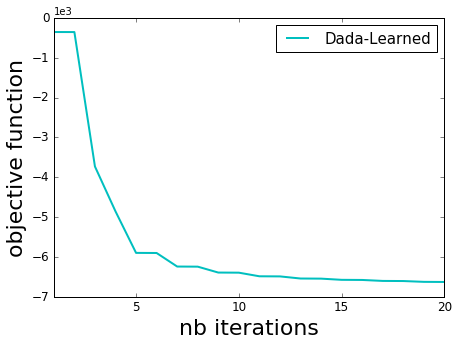

In [6]:
# convergence
plt.figure(1, figsize=(7, 5))

plt.xlabel('nb iterations', fontsize=22)
plt.ylabel('objective function', fontsize=22)

for k, r_list in results.items():
    try:
        plt.plot([i for i in range(len(r_list))], [r['obj-function'] for r in r_list], label=k, color=colors[k], linewidth=2)
    except:
        pass

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(1, 20)
plt.legend(loc='upper right', fontsize=15)

plt.savefig("moons-clust-obj.pdf", bbox_inches="tight")